In [1]:
%pip install bert-extractive-summarizer
%pip install transformers
%pip install rouge_score



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24932 sha256=54307ebce3ac3a455d635b25b27d8233e4de585b5d7eecefd22e52ea8edacc9d
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score
Note: you may need to restart the kernel to use updated packages.


In [2]:
from summarizer import Summarizer
from transformers import pipeline, GPT2Tokenizer, GPT2LMHeadModel, T5Tokenizer, T5ForConditionalGeneration, PegasusTokenizer, PegasusForConditionalGeneration, BartTokenizer, BartForConditionalGeneration

In [6]:
with open('/kaggle/input/indias-g20-document-summarization-and-translation/IndiaG20.txt', 'r', encoding='latin-1') as file:
    data = file.read().replace('\n', '').replace('\x92', '')  # Replace 0x92 with an appropriate character or an empty string


In [7]:
max_chunk_length = 1024
chunks = [data[i:i + max_chunk_length] for i in range(0, len(data), max_chunk_length)]

In [8]:
# Use BERT for extractive summarization
bert_model = pipeline('summarization')
bert_summaries = []
for chunk in chunks:
    print("Input Text Length:", len(chunk))
    bert_summary = bert_model(chunk, max_length=200, min_length=50, length_penalty=2.0, num_beams=4, temperature=0.5)
    bert_summaries.append(bert_summary[0]['summary_text'])
reference_summary = ' '.join(bert_summaries)
print("Reference BERT Summary:", reference_summary)


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


Input Text Length: 1024


/opt/conda/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.5` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Input Text Length: 1024
Input Text Length: 1024
Input Text Length: 1024
Input Text Length: 1024


Your max_length is set to 200, but your input_length is only 141. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=70)


Input Text Length: 607
Reference BERT Summary:  The world paused to take a deep breath on June 21 as we celebrated the 9th International Day of Yoga . Prime Minister Narendra Modi called upon the world to use the power of Yoga to build bridges of friendship, a peaceful world, and a cleaner, greener and sustainable future .  This year, the theme for the International Day of Yoga was ‘Yoga for Vasudhaiva Kutumbakam. a resounding consensus. The reality of the present and promise of the future cannot be viewed without reflection of the past. So, allow me to take you back to the day Prime Minister Modi extended the gift of Yoga to the world .  Prime Minister Modi said that our destinies are interlinked and if we were to continue with a zero sum game mindset, our collective future would bein danger . As part of the G20 meetings, delegates have had the opportunity to attend beneficial Yoga sessions, including sessions in Rishikesh, the 'Yoga capital of the world'  Prime Minister Modis propose

In [9]:
# Load GPT-2 model and tokenizer
gpt2_model_name = "gpt2"
gpt2_tokenizer = GPT2Tokenizer.from_pretrained(gpt2_model_name)
gpt2_model = GPT2LMHeadModel.from_pretrained(gpt2_model_name)

# Define your input for GPT-2 (replace this with your actual input)
inputs_gpt2 = gpt2_tokenizer(data, return_tensors="pt", max_length=512, truncation=True)

# Get the maximum position embeddings
max_input_length = gpt2_model.config.max_position_embeddings

# Truncate the input text if it exceeds the maximum position embeddings
if inputs_gpt2['input_ids'].shape[1] > max_input_length:
    inputs_gpt2['input_ids'] = inputs_gpt2['input_ids'][:, :max_input_length]
    inputs_gpt2['attention_mask'] = inputs_gpt2['attention_mask'][:, :max_input_length]

# Generate summary with GPT-2
max_summary_length = 513# Set an appropriate value
gpt2_summary_ids = gpt2_model.generate(
    inputs_gpt2['input_ids'],
    attention_mask=inputs_gpt2['attention_mask'],
    max_length=max_summary_length,
    length_penalty=2.0,
    num_beams=4,
    temperature=0.5,
    pad_token_id=gpt2_tokenizer.eos_token_id
)

gpt2_summary_text = gpt2_tokenizer.decode(gpt2_summary_ids[0], skip_special_tokens=True)

print("GPT-2 Summary:", gpt2_summary_text)

GPT-2 Summary: Indias G20 Presidency and Power of YogaThe world paused to take a deep breath on June 21 as we celebrated the 9th International Day of Yoga. Nine years after his clarion call for Yoga at the United Nations General Assembly, Prime Minister Shri Narendra Modi returned to New York and led the session commemorating the International Day of Yoga at the UN Headquarters. With over 2,000 enthusiasts participating in the session led by Prime Minister Modi, a new Guinness World Record was also created on June 21 for the participation from most nationalities. At this momentous occasion, Prime Minister Modi called upon the world to use the power of Yoga to build bridges of friendship, a peaceful world, and a cleaner, greener and sustainable future. In 2014, when he addressed the 69th session of the United Nations General Assembly, Prime Minister Modi had urged the international community to adopt an International Yoga Day - the invaluable gift of Indias ancient tradition. Within 7

In [10]:
# Use T5 for abstractive summarization
t5_model_name = "t5-large"  # You can choose a different T5 variant if needed
t5_tokenizer = T5Tokenizer.from_pretrained(t5_model_name)
t5_model = T5ForConditionalGeneration.from_pretrained(t5_model_name)
inputs_t5 = t5_tokenizer("summarize: " + data, return_tensors="pt", max_length=1024, truncation=True)
t5_summary_ids = t5_model.generate(inputs_t5['input_ids'], max_length=1025, length_penalty=2.0, num_beams=10, temperature=2)
t5_summary_text = t5_tokenizer.decode(t5_summary_ids[0], skip_special_tokens=True)
print("t5 Summary:", t5_summary_text)

/opt/conda/lib/python3.10/site-packages/transformers/models/t5/tokenization_t5.py:240: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-large automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use th

/opt/conda/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `2` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


t5 Summary: the world paused to take a deep breath on June 21 as we celebrated the 9th International Day of Yoga at the UN Headquarters. with over 2,000 enthusiasts participating in the session led by prime minister Shri Narendra Modi, a new Guinness World Record was also created. this year, the theme for the International Day of Yoga was Yoga for Vasudhaiva Kutumbakam. this is the essence of indias G20 Presidency as well.


In [11]:
pegasus_model_name = "google/pegasus-xsum"
pegasus_tokenizer = PegasusTokenizer.from_pretrained(pegasus_model_name, padding_side="left")
pegasus_model = PegasusForConditionalGeneration.from_pretrained(pegasus_model_name)
inputs_pegasus = pegasus_tokenizer(data, return_tensors="pt", max_length=1024, truncation=True)

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [12]:
max_input_length_pegasus = pegasus_model.config.max_position_embeddings
if inputs_pegasus['input_ids'].shape[1] > max_input_length_pegasus:
    inputs_pegasus['input_ids'] = inputs_pegasus['input_ids'][:, :max_input_length_pegasus]
    inputs_pegasus['attention_mask'] = inputs_pegasus['attention_mask'][:, :max_input_length_pegasus]

In [13]:
pegasus_summary_ids = pegasus_model.generate(
    inputs_pegasus['input_ids'],
    max_length=513,
    length_penalty=2.0,
    num_beams=4,
    temperature=0.5,
    pad_token_id=pegasus_tokenizer.eos_token_id
)

/opt/conda/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.5` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


In [14]:
pegasus_summary_text = pegasus_tokenizer.decode(pegasus_summary_ids[0], skip_special_tokens=True)
print("Pegasus Summary:", pegasus_summary_text)

Pegasus Summary: In our series of letters from African journalists, filmmaker and columnist Farai Sevenzo looks at Indias G20 Presidency and how Yoga is intrinsically linked to Indias G20 Presidency today.


In [15]:
bart_model_name = "facebook/bart-large-cnn"  # BART pre-trained model for summarization
bart_tokenizer = BartTokenizer.from_pretrained(bart_model_name)
bart_model = BartForConditionalGeneration.from_pretrained(bart_model_name)
inputs_bart = bart_tokenizer(data, return_tensors="pt", max_length=1024, truncation=True)
bart_summary_ids = bart_model.generate(inputs_bart['input_ids'], max_length=max_input_length, length_penalty=2.0, num_beams=4, temperature=0.5)
bart_summary_text = bart_tokenizer.decode(bart_summary_ids[0], skip_special_tokens=True)

In [16]:
print("BART Summary:", bart_summary_text)

BART Summary: The world paused to take a deep breath on June 21 as we celebrated the 9th International Day of Yoga. Nine years after his clarion call for Yoga at the United Nations General Assembly, Prime Minister Shri Narendra Modi returned to New York and led the session. With over 2,000 enthusiasts participating in the session led by Prime Minister Modi, a new Guinness World Record was also created for the participation from most nationalities.


In [17]:
# Now you have summaries from GPT-2, T5, Pegasus, and BART using the original dataset
print("GPT-2 Summary:", gpt2_summary_text)
print('')
print("T5 Summary:", t5_summary_text)
print('')
print("Pegasus Summary:", pegasus_summary_text)
print('')
print("BART Summary:", bart_summary_text)


GPT-2 Summary: Indias G20 Presidency and Power of YogaThe world paused to take a deep breath on June 21 as we celebrated the 9th International Day of Yoga. Nine years after his clarion call for Yoga at the United Nations General Assembly, Prime Minister Shri Narendra Modi returned to New York and led the session commemorating the International Day of Yoga at the UN Headquarters. With over 2,000 enthusiasts participating in the session led by Prime Minister Modi, a new Guinness World Record was also created on June 21 for the participation from most nationalities. At this momentous occasion, Prime Minister Modi called upon the world to use the power of Yoga to build bridges of friendship, a peaceful world, and a cleaner, greener and sustainable future. In 2014, when he addressed the 69th session of the United Nations General Assembly, Prime Minister Modi had urged the international community to adopt an International Yoga Day - the invaluable gift of Indias ancient tradition. Within 7

In [18]:
from rouge_score import rouge_scorer
from tabulate import tabulate

In [19]:
gpt2_scores = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True).score(gpt2_summary_text, reference_summary)
t5_scores = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True).score(t5_summary_text, reference_summary)
pegasus_scores = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True).score(pegasus_summary_text, reference_summary)
bart_scores = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True).score(bart_summary_text, reference_summary)


In [20]:
# Create a table
table_data = [
    ["Metric", "GPT-2", "T5", "Pegasus", "BART"],
    ["ROUGE-1", gpt2_scores['rouge1'].fmeasure, t5_scores['rouge1'].fmeasure, pegasus_scores['rouge1'].fmeasure, bart_scores['rouge1'].fmeasure],
    ["ROUGE-2", gpt2_scores['rouge2'].fmeasure, t5_scores['rouge2'].fmeasure, pegasus_scores['rouge2'].fmeasure, bart_scores['rouge2'].fmeasure],
    ["ROUGE-L", gpt2_scores['rougeL'].fmeasure, t5_scores['rougeL'].fmeasure, pegasus_scores['rougeL'].fmeasure, bart_scores['rougeL'].fmeasure],
]

# Print the table
table_str = tabulate(table_data, headers="firstrow", tablefmt="grid")
print(table_str)

+----------+----------+----------+------------+----------+
| Metric   |    GPT-2 |       T5 |    Pegasus |     BART |
+==========+==========+==========+============+==========+
| ROUGE-1  | 0.637518 | 0.289474 | 0.0595238  | 0.240838 |
+----------+----------+----------+------------+----------+
| ROUGE-2  | 0.407355 | 0.201058 | 0.00598802 | 0.131579 |
+----------+----------+----------+------------+----------+
| ROUGE-L  | 0.369535 | 0.236842 | 0.0416667  | 0.209424 |
+----------+----------+----------+------------+----------+


In [21]:
# Combine summaries
combined_summary = f"{gpt2_summary_text} {t5_summary_text} {pegasus_summary_text} {bart_summary_text}"

# Calculate Rouge scores for the combined summary
combined_scores = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True).score(combined_summary, reference_summary)

# Add combined scores to the table data
table_data.append(["ROUGE-1 Combined", combined_scores['rouge1'].fmeasure, "", "", ""])
table_data.append(["ROUGE-2 Combined", combined_scores['rouge2'].fmeasure, "", "", ""])
table_data.append(["ROUGE-L Combined", combined_scores['rougeL'].fmeasure, "", "", ""])

# Print the updated table
table_str_combined = tabulate(table_data, headers="firstrow", tablefmt="grid")
print(table_str_combined)


+------------------+----------+---------------------+----------------------+---------------------+
| Metric           |    GPT-2 | T5                  | Pegasus              | BART                |
+==================+==========+=====================+======================+=====================+
| ROUGE-1          | 0.637518 | 0.2894736842105263  | 0.05952380952380953  | 0.2408376963350785  |
+------------------+----------+---------------------+----------------------+---------------------+
| ROUGE-2          | 0.407355 | 0.20105820105820107 | 0.005988023952095808 | 0.13157894736842107 |
+------------------+----------+---------------------+----------------------+---------------------+
| ROUGE-L          | 0.369535 | 0.23684210526315788 | 0.04166666666666667  | 0.20942408376963353 |
+------------------+----------+---------------------+----------------------+---------------------+
| ROUGE-1 Combined | 0.528217 |                     |                      |                     |
+---------

In [22]:
import matplotlib.pyplot as plt

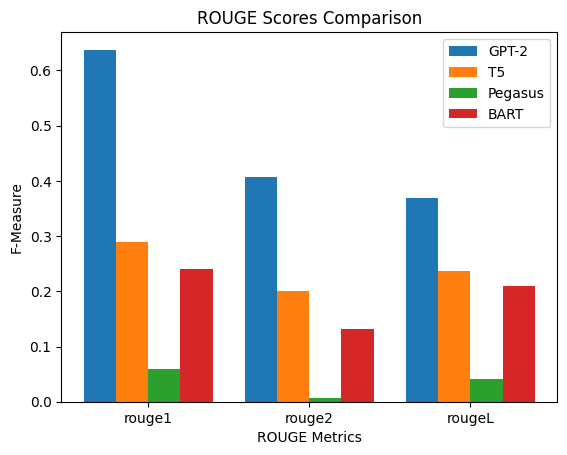

In [23]:
metrics = ['rouge1', 'rouge2', 'rougeL']
gpt2_values = [gpt2_scores[metric].fmeasure for metric in metrics]
t5_values = [t5_scores[metric].fmeasure for metric in metrics]
pegasus_values = [pegasus_scores[metric].fmeasure for metric in metrics]
bart_values = [bart_scores[metric].fmeasure for metric in metrics]

# Bar chart
bar_width = 0.2
index = range(len(metrics))

fig, ax = plt.subplots()
bar1 = ax.bar(index, gpt2_values, bar_width, label='GPT-2')
bar2 = ax.bar([i + bar_width for i in index], t5_values, bar_width, label='T5')
bar3 = ax.bar([i + 2 * bar_width for i in index], pegasus_values, bar_width, label='Pegasus')
bar4 = ax.bar([i + 3 * bar_width for i in index], bart_values, bar_width, label='BART')

# Customize chart
ax.set_xlabel('ROUGE Metrics')
ax.set_ylabel('F-Measure')
ax.set_title('ROUGE Scores Comparison')
ax.set_xticks([i + 1.5 * bar_width for i in index])
ax.set_xticklabels(metrics)
ax.legend()

# Show the plot
plt.show()

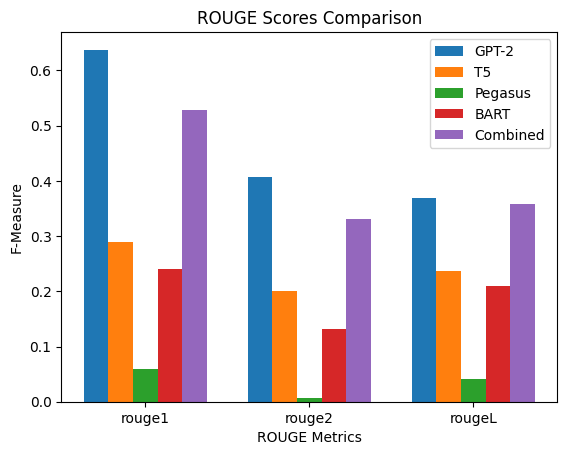

In [24]:
import matplotlib.pyplot as plt

# Combine summaries
combined_summary = f"{gpt2_summary_text} {t5_summary_text} {pegasus_summary_text} {bart_summary_text}"

# Calculate Rouge scores for the combined summary
combined_scores = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True).score(combined_summary, reference_summary)

# Extract F-measure values for each metric
combined_values = [combined_scores[metric].fmeasure for metric in metrics]

# Bar chart
bar_width = 0.15
index = range(len(metrics))

fig, ax = plt.subplots()
bar1 = ax.bar(index, gpt2_values, bar_width, label='GPT-2')
bar2 = ax.bar([i + bar_width for i in index], t5_values, bar_width, label='T5')
bar3 = ax.bar([i + 2 * bar_width for i in index], pegasus_values, bar_width, label='Pegasus')
bar4 = ax.bar([i + 3 * bar_width for i in index], bart_values, bar_width, label='BART')
bar5 = ax.bar([i + 4 * bar_width for i in index], combined_values, bar_width, label='Combined')

# Customize chart
ax.set_xlabel('ROUGE Metrics')
ax.set_ylabel('F-Measure')
ax.set_title('ROUGE Scores Comparison')
ax.set_xticks([i + 2 * bar_width for i in index])
ax.set_xticklabels(metrics)
ax.legend()

# Show the plot
plt.show()


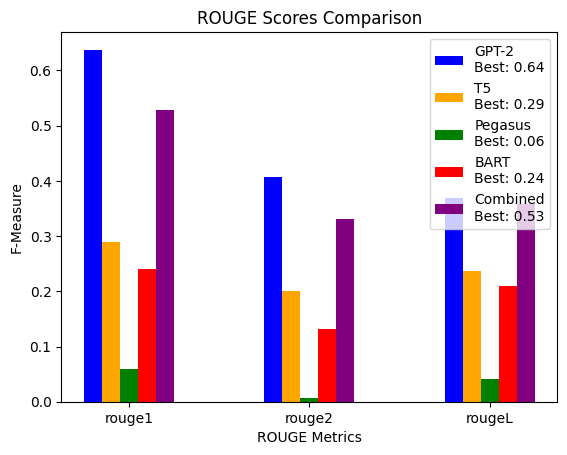

In [25]:
import matplotlib.pyplot as plt

# Combine summaries
combined_summary = f"{gpt2_summary_text} {t5_summary_text} {pegasus_summary_text} {bart_summary_text}"

# Calculate Rouge scores for the combined summary
combined_scores = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True).score(combined_summary, reference_summary)

# Extract F-measure values for each metric
gpt2_values = [gpt2_scores[metric].fmeasure for metric in metrics]
t5_values = [t5_scores[metric].fmeasure for metric in metrics]
pegasus_values = [pegasus_scores[metric].fmeasure for metric in metrics]
bart_values = [bart_scores[metric].fmeasure for metric in metrics]
combined_values = [combined_scores[metric].fmeasure for metric in metrics]

# Find the model with the best scores for each metric
best_gpt2_metric = max(gpt2_values)
best_t5_metric = max(t5_values)
best_pegasus_metric = max(pegasus_values)
best_bart_metric = max(bart_values)
best_combined_metric = max(combined_values)

# Bar chart
bar_width = 0.1
index = range(len(metrics))

fig, ax = plt.subplots()
bar1 = ax.bar(index, gpt2_values, bar_width, label=f'GPT-2\nBest: {best_gpt2_metric:.2f}', color='blue')
bar2 = ax.bar([i + bar_width for i in index], t5_values, bar_width, label=f'T5\nBest: {best_t5_metric:.2f}', color='orange')
bar3 = ax.bar([i + 2 * bar_width for i in index], pegasus_values, bar_width, label=f'Pegasus\nBest: {best_pegasus_metric:.2f}', color='green')
bar4 = ax.bar([i + 3 * bar_width for i in index], bart_values, bar_width, label=f'BART\nBest: {best_bart_metric:.2f}', color='red')
bar5 = ax.bar([i + 4 * bar_width for i in index], combined_values, bar_width, label=f'Combined\nBest: {best_combined_metric:.2f}', color='purple')

# Customize chart
ax.set_xlabel('ROUGE Metrics')
ax.set_ylabel('F-Measure')
ax.set_title('ROUGE Scores Comparison')
ax.set_xticks([i + 2 * bar_width for i in index])
ax.set_xticklabels(metrics)
ax.legend()

# Show the plot
plt.show()


In [26]:
! pip install sentencepiece

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [27]:
!pip freeze | grep transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


transformers==4.35.0


In [28]:
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast

In [29]:
model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50-one-to-many-mmt")

In [30]:
tokenizer = MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50-one-to-many-mmt", src_lang="en_XX")


In [31]:
max_chunk_size = 512  # Adjust this based on the model's maximum sequence length
chunks = [gpt2_summary_text[i:i+max_chunk_size] for i in range(0, len(gpt2_summary_text), max_chunk_size)]
translations = []
for chunk in chunks:
    model_inputs = tokenizer(chunk, return_tensors="pt", max_length=max_chunk_size, truncation=True)
    generated_tokens = model.generate(**model_inputs, forced_bos_token_id=tokenizer.lang_code_to_id["hi_IN"])
    translation_chunk = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
    translations.extend(translation_chunk)

final_translation = " ".join(translations)
print(final_translation)

भारत की जी-20 पीठासीन और योग की शक्ति 21 जून को जब हम 9वें अंतरराष्ट्रीय योग दिवस को मना रहे थे, विश्व ने गहरा सांस लेने के लिए रुक दिया। संयुक्त राष्ट्र महासभा में योग के लिए अपने उद्बोधन के नौ वर्ष बाद, प्रधानमंत्री श्री नरेंद्र मोदी न्यूयॉर्क लौटे और संयुक्त राष्ट्र मुख्यालय में अंतरराष्ट्रीय योग दिवस की स्मृति में आयोजित सत्र का नेतृत्व किया। प्रधानमंत्री मोदी के नेतृत्व में आयोजित सत्र में 2,000 से अधिक उत्साही सदस्यों के साथ 21 जून को नई गिंस विश्व रिकार्ड भी बनाई गई। अधिकांश राष्ट्रों की भागीदारी। इस महत्त्वपूर्ण अवसर पर प्रधानमंत्री मोदी ने विश्व को ‘योग की शक्ति का प्रयोग मित्रता, शांतिपूर्ण विश्व और एक स्वच्छ, हरित और स्थायी भविष्य के लिए करने के लिए’ करने का आह्वान किया। 2014 में जब उन्होंने संयुक्त राष्ट्र महासभा के 69वें अधिवेशन में भाषण दिया था, तब प्रधानमंत्री मोदी ने अंतरराष्ट्रीय समुदाय को एक अंतरराष्ट्रीय योग दिवस को अपनाने के लिए आग्रह किया था-भारत की प्राचीन परंपरा का अमूल्य उपहार। 75 दिनों के भीतर प्रस्ताव के साथ स्वीकार किया गया था एक सर्वसम्मति. तब से लाखों लोगों